# Wine Fraud

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# memuat dataset
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\wine_fraud.csv')

In [3]:
# menampilkan 5 baris pertama
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


## EDA - exploratory data analysis

In [4]:
df.shape

(6497, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [8]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

In [9]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [10]:
plt.style.use(['science','notebook','grid'])

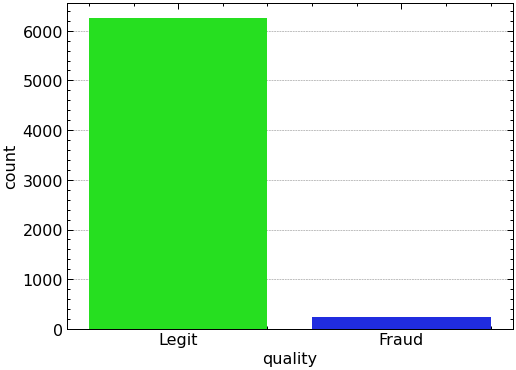

In [11]:
sns.countplot(x='quality', data=df, palette='hsv');

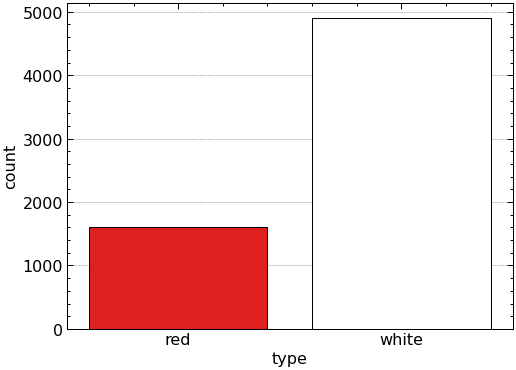

In [12]:
sns.countplot(x='type', data=df, palette=['red','white'], edgecolor='k');

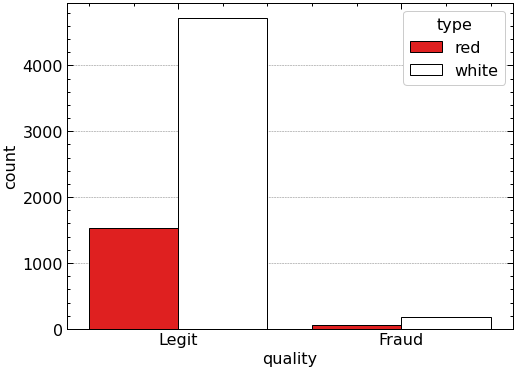

In [13]:
sns.countplot(x='quality',hue='type', data=df, palette=['red','white'], edgecolor='k');

In [14]:
# persentasi red wine terhadap fraud

reds = df[df['type']=='red']
reds_fraud = reds[reds['quality']=='Fraud']
percent_reds = float(len(reds_fraud)/ len(reds))
print(f'jumlah persentase red wine fraud :', '{0:.2f}%'.format(percent_reds * 100))


jumlah persentase red wine fraud : 3.94%


In [15]:
# persentase white wine terhadap fraud

white = df[df['type']=='white']
white_fraud = white[white['quality']=='Fraud']
percent_white = float(len(white_fraud)/len(white))
print(f'jumlah persentase white wine fraud :', '{0:.2f}%'.format(percent_white *100) )

jumlah persentase white wine fraud : 3.74%


In [16]:
# menghitung korelasi dengan isi kolom quality
df['Fraud'] = df['quality'].map({'Legit':1 ,'Fraud':0})

In [17]:
df.corr()['Fraud'].sort_values()

volatile acidity       -0.151228
chlorides              -0.034499
fixed acidity          -0.021794
pH                     -0.020107
density                -0.016351
sulphates               0.034046
total sulfur dioxide    0.035252
residual sugar          0.048756
alcohol                 0.051141
citric acid             0.061789
free sulfur dioxide     0.085204
Fraud                   1.000000
Name: Fraud, dtype: float64

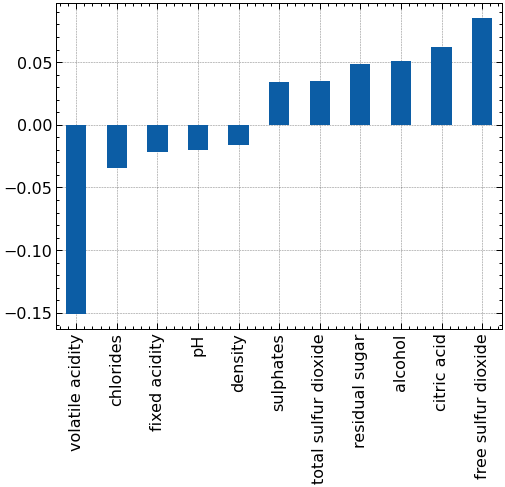

In [18]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar');

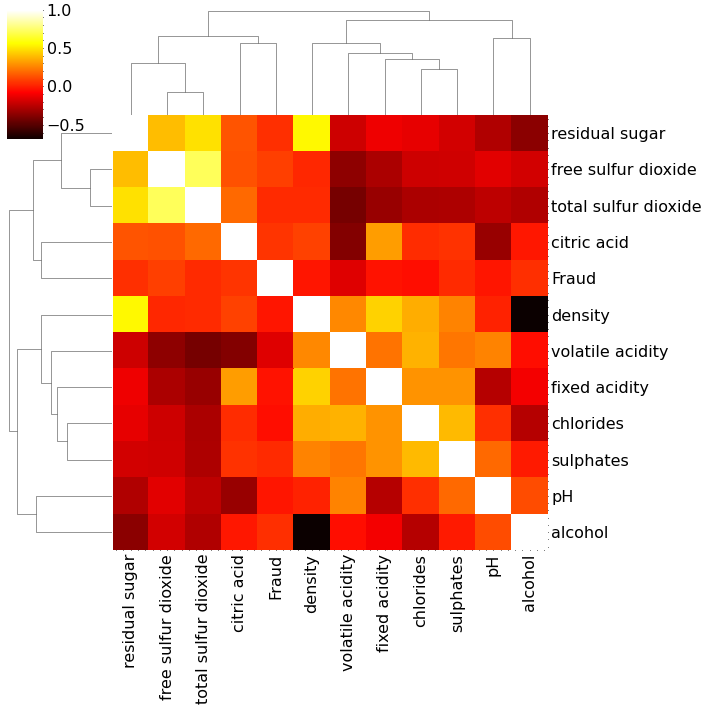

In [19]:
sns.clustermap(df.corr(), cmap='hot');

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,1


In [21]:
# menghapus kolom fraud
df = df.drop('Fraud', axis=1)

In [22]:
# meruba isi data type menjadi angka
df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0


In [34]:
# membut data Feature dan data label
X = df.drop('quality', axis=1).values
y = df['quality'].values

## Preprocessing LableBinarizer 
merubah data menjadi angka biner

In [35]:
from sklearn.preprocessing import LabelBinarizer

In [36]:
lb = LabelBinarizer()

In [37]:
y = lb.fit_transform(y).ravel()

In [38]:
lb.classes_

array(['Fraud', 'Legit'], dtype='<U5')

## Split data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.1, random_state= 101)

In [41]:
print(X_train, '\n')
print(y_train)

[[ 8.6    0.685  0.1   ...  0.65   9.55   0.   ]
 [ 6.8    0.35   0.53  ...  0.4    9.4    1.   ]
 [ 7.5    0.52   0.4   ...  0.64  11.8    0.   ]
 ...
 [ 8.3    0.85   0.14  ...  0.54  10.1    0.   ]
 [ 6.3    0.6    0.1   ...  0.51  12.1    0.   ]
 [ 7.1    0.18   0.49  ...  0.53  11.3    1.   ]] 

[1 1 1 ... 1 1 1]


## Preprocessing Scaling data

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
scaler.fit(X_train)

StandardScaler()

In [45]:
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

---

## Model SVM Classifier dan Hyperparamater Tuning GridSerchCV

Dari hasil pengamatan data terdapat `ketidak seimbangan` antara kualitas wine yang Fraud dan Legit, maka harus ada penangan khusus dalam menyelesaikannnya

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [51]:
model = SVC(class_weight = 'balanced')

In [52]:
param_grid = {'C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
             'gamma' : ['scale', 'auto']}

In [54]:
grid = GridSearchCV(model, param_grid)

In [55]:
grid.fit(X_train_scaler, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
                         'gamma': ['scale', 'auto']})

In [56]:
grid.best_estimator_

SVC(C=100, class_weight='balanced')

In [57]:
grid.best_estimator_.get_params

<bound method BaseEstimator.get_params of SVC(C=100, class_weight='balanced')>

In [59]:
grid.best_score_

0.9326163789636844

In [60]:
preds = grid.predict(X_test_scaler)

---

## Evaluasi model

In [61]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score

In [62]:
confusion_matrix(y_test , preds)

array([[  7,  20],
       [ 28, 595]], dtype=int64)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


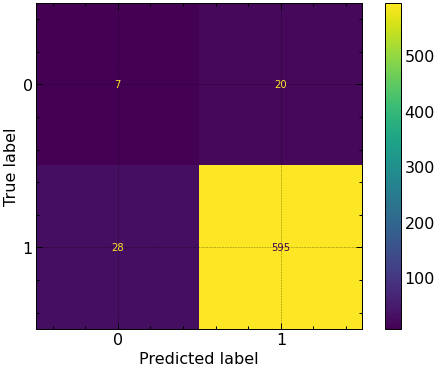

In [63]:
plot_confusion_matrix(grid, X_test_scaler, y_test)

In [64]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.20      0.26      0.23        27
           1       0.97      0.96      0.96       623

    accuracy                           0.93       650
   macro avg       0.58      0.61      0.59       650
weighted avg       0.94      0.93      0.93       650



In [65]:
accuracy_score(y_test, preds)

0.9261538461538461

-----